<a href="https://colab.research.google.com/github/ryana-tammi/CUSTOMER-CHURN-PREDICTION-E-COMMERCE-CASE-/blob/main/customer-churn-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1 - Exploratory Data Analysis

Import Libraries and Dataset first!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### LOAD DATSET

1. Dari GDRIVE

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/FINAL PROJECT Kel 2 Batch 22/E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df_stg1 = df.copy()
df_stg1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## CHURN 

In [ ]:
churn = df[df['Churn']==1]
jumlah_churn = churn['Churn'].sum()
jumlah_churn

948

In [ ]:
total_customer = df['CustomerID'].nunique()
total_customer

5630

In [ ]:
print('Churn Ratenya adalah', jumlah_churn/total_customer*100,'%')

Churn Ratenya adalah 16.838365896980463 %


In [ ]:
a = df.groupby(['Churn'])['CustomerID'].count().reset_index()
a['Persentase(%)'] = a['CustomerID']/total_customer*100
a

,Churn,CustomerID,Persentase(%)
0,0,4682,83.161634
1,1,948,16.838366


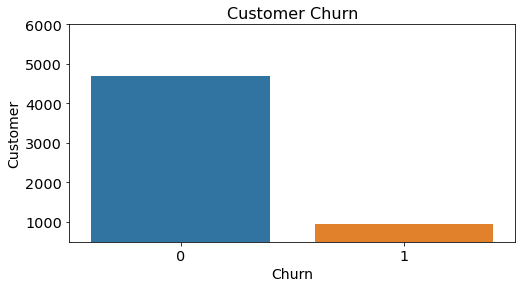

In [ ]:
plt.figure(figsize = (8,4))
sns.barplot(x='Churn', y = 'CustomerID', data = a)
plt.title('Customer Churn', fontsize = 16)
plt.xlabel('Churn', size =14)
plt.ylabel('Customer', size = 14)
plt.ylim(500,6000);

## <b> 1. Descriptive Statistics

informasi general tentang dataframe

In [ ]:
df_stg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
print('Data yang duplikat = ', df_stg1.duplicated().sum())

Data yang duplikat =  0


<b> Kolom yang memiliki Missing value

In [ ]:
df_stg1.isna().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

<b> Pengamatan:
1. Data terdiri dari 5630 baris dengan total 20 kolom
2. Terdapat null/missing values pada kolom: `DaySinceLastOrder`,`OrderAmountHikeFromlastYear`,`Tenure`,`OrderCount`,`CouponUsed`,`HourSpendOnApp`,`WarehouseToHome`
3. Untuk tipe data churn dan complain, ada baiknya seharusnya bertipe boolean. akan tetapi dalam case ini tidak terlalu mengganggu proses pengolahan data nantinya. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (<b> Semua tipe data sudah sesuai)
4. Tidak ada duplicate data antar baris.

### UNDERSTAND THE DATA
- Customer ID ---> berisikan ID dari customer
- Churn ----> Churn atau tidak?
- Tenure ---> Berapa lama customer menggunakan layanan (loyalitas)
- PreferredloginDevice ---> customer lebih memilih login dengan device komputer, handphone dll
- CityTier ---> kode kota
- WareHousetoHome ---> jarak gudang e commercenya ke rumah pelanggan
- PreferredPaymentMod ---> Metode pembayaran yang lebih dipilih untuk digunakan
- Gender ---> jenis kelamin
- HourSpendOnApp ---> waktu yang dihabiskan untuk menjelajah di aplikasi (dalam jam)
- Number of Device Registerd -----> no hp yang diregistrasi
- PreferedOrderCat ---> katalog yang sering diorder
- SatisfactionScore ----> tingkat kepuasan
- MaritalStatus ----> status pernikahan
- NumberOfAddress  ---> no alamat
- OrderAmountHikeFromlastYear -----> Kenaikan Jumlah Pesanan Dari Tahun Lalu
- CouponUsed ----> Kupon yang digunakan
- OrderCount ----> jumlah order
- DaySinceLastOrder -----> Jarak hari ini dengan hari terakhir/rentang waktu customer order pesanan. 
- CashbackAmount ----> Jumlah cashback

In [ ]:
df_stg1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
percentage_of_null_values = ((df_stg1.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

<b> Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. atau opsi lain, digunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier. 

#### <b> Data Snippet

In [ ]:
df_stg1.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2520,52521,0,12.0,Mobile Phone,1,18.0,Credit Card,Male,3.0,3,Laptop & Accessory,4,Married,5,0,21.0,1.0,1.0,0.0,152.95
3867,53868,0,24.0,Mobile Phone,1,24.0,Debit Card,Female,3.0,5,Fashion,5,Married,7,0,16.0,2.0,NaN,12.0,257.69
1770,51771,0,23.0,Mobile Phone,1,35.0,Debit Card,Male,2.0,4,Grocery,3,Married,1,0,15.0,NaN,15.0,7.0,270.46
1156,51157,1,0.0,Mobile Phone,3,33.0,Debit Card,Male,2.0,3,Laptop & Accessory,1,Single,2,1,18.0,0.0,7.0,7.0,158.13
623,50624,1,0.0,Computer,3,35.0,Credit Card,Male,3.0,5,Laptop & Accessory,5,Single,9,0,18.0,0.0,2.0,2.0,149.69


### STATISTICAL SUMMARY

#### <b> Grouping by Data Variable Type (Pick + Separate Columns)

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Tenure','CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'DaySinceLastOrder','NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

<b> A. DATA NUMERICAL

In [ ]:
df_stg1[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


Beberapa kolom/feature sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh), namun ada beberapa kolom yang  skew, dilihat dari nilai mean dan median ---->        "mean>median" = skew ke kanan (akan kita lihat visualisasi nya di bawah) yaitu kolom `Tenure`, `WareHouseToHome`, `OrderCount`,`DaySinceLastOrder`,`CashbackAmount`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`  dst .

<b> B. DATA CATEGORICAL

In [ ]:
df_stg1[cats].describe().transpose()

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


<b> Untuk Tipe data categorical, sekilas tidak ada yang aneh untuk descripstive statistic nya. akan tetapi jika divisualisasikan (di Univariate analysis), akan terdapat beberapa kateogori yang sebenarnya 1 pengertian, tapi justru dibuat 2 definisi. contoh : CC dan credit card pada fitur metode pembayaran (spoiler).

In [ ]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 0 to 5629
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       4081 non-null   float64
 1   CityTier                     4081 non-null   int64  
 2   WarehouseToHome              4081 non-null   float64
 3   HourSpendOnApp               4081 non-null   float64
 4   NumberOfDeviceRegistered     4081 non-null   int64  
 5   SatisfactionScore            4081 non-null   int64  
 6   DaySinceLastOrder            3774 non-null   float64
 7   NumberOfAddress              4081 non-null   int64  
 8   OrderAmountHikeFromlastYear  4081 non-null   float64
 9   CouponUsed                   4081 non-null   float64
 10  OrderCount                   4081 non-null   float64
 11  CashbackAmount               4081 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 414.5 KB


In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 0 to 5629
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PreferredLoginDevice  4081 non-null   object
 1   PreferredPaymentMode  4081 non-null   object
 2   Gender                4081 non-null   object
 3   PreferedOrderCat      4081 non-null   object
 4   MaritalStatus         4081 non-null   object
dtypes: object(5)
memory usage: 191.3+ KB


#### <b> Value Counting

In [ ]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column PreferredLoginDevice:
Mobile Phone    2148
Computer        1206
Phone            727
Name: PreferredLoginDevice, dtype: int64

Value count column PreferredPaymentMode:
Debit Card          1663
Credit Card         1205
E wallet             498
COD                  301
UPI                  300
Cash on Delivery      79
CC                    35
Name: PreferredPaymentMode, dtype: int64

Value count column Gender:
Male      2456
Female    1625
Name: Gender, dtype: int64

Value count column PreferedOrderCat:
Laptop & Accessory    2014
Mobile Phone          1227
Fashion                678
Mobile                 119
Grocery                 25
Others                  18
Name: PreferedOrderCat, dtype: int64

Value count column MaritalStatus:
Married     2157
Single      1332
Divorced     592
Name: MaritalStatus, dtype: int64



## <b> 2. Univariate Analysis

In [ ]:
df_stg1_1 = df_stg1.copy()

In [ ]:
df_stg1_1.drop(['CustomerID'], axis=1, inplace=True) #apakah kolom perlu di hapus disini? karna akan dijadikan target saat proses pemodelan?

In [ ]:
df_stg1_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df_stg1_1.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


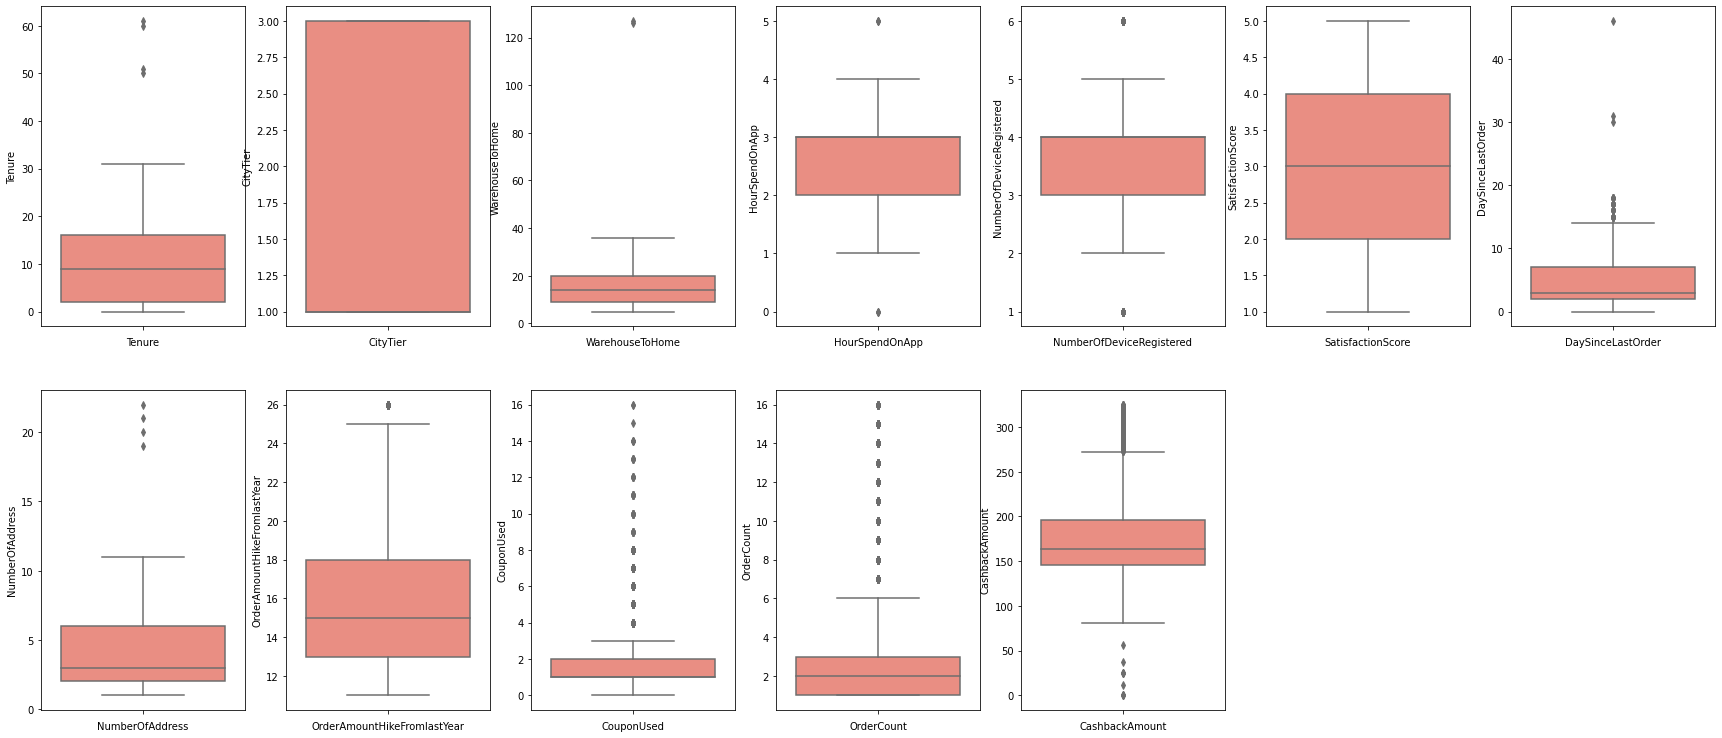

In [ ]:
plt.figure(figsize=(30,20))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df_stg1[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `CouponUsed`, `OrderCount` dan `CashbackAmount`
* Outlier yang tidak terlalu banyak ada pada kolom `Tenure`, `WareHouseToHome`, `TimeSpendOnApp`, `NumberOfDeviceRegistered`, `OrderAmountHikeFromLastYear`
* Dari boxplotnya juga tampak mana distribusi yang terlihat *skewed*: `Tenure`, `Couponused`, `OrderCount`                                       dan agak skewed --> `OrderAmountHikeFromlastYear` 
* Beberapa kolom sudah memiliki data distribution yang cukup baik/normal, seperti `HourSpendOnApp`, `NumberOfDeviceRegister`dan `SatisfactionScore`

<b> Outlier ini nantinya dapat di "Handle" dengan Dua opsi, yaitu 
1. Menghapus Outlier berdasarkan IQR 
2. Menghapus Outlier berdasarkan Z-Score (untuk outlier yang ekstrim ----> pada data dengan sebaran/distribusi normal,, sekitar ~0,3%)

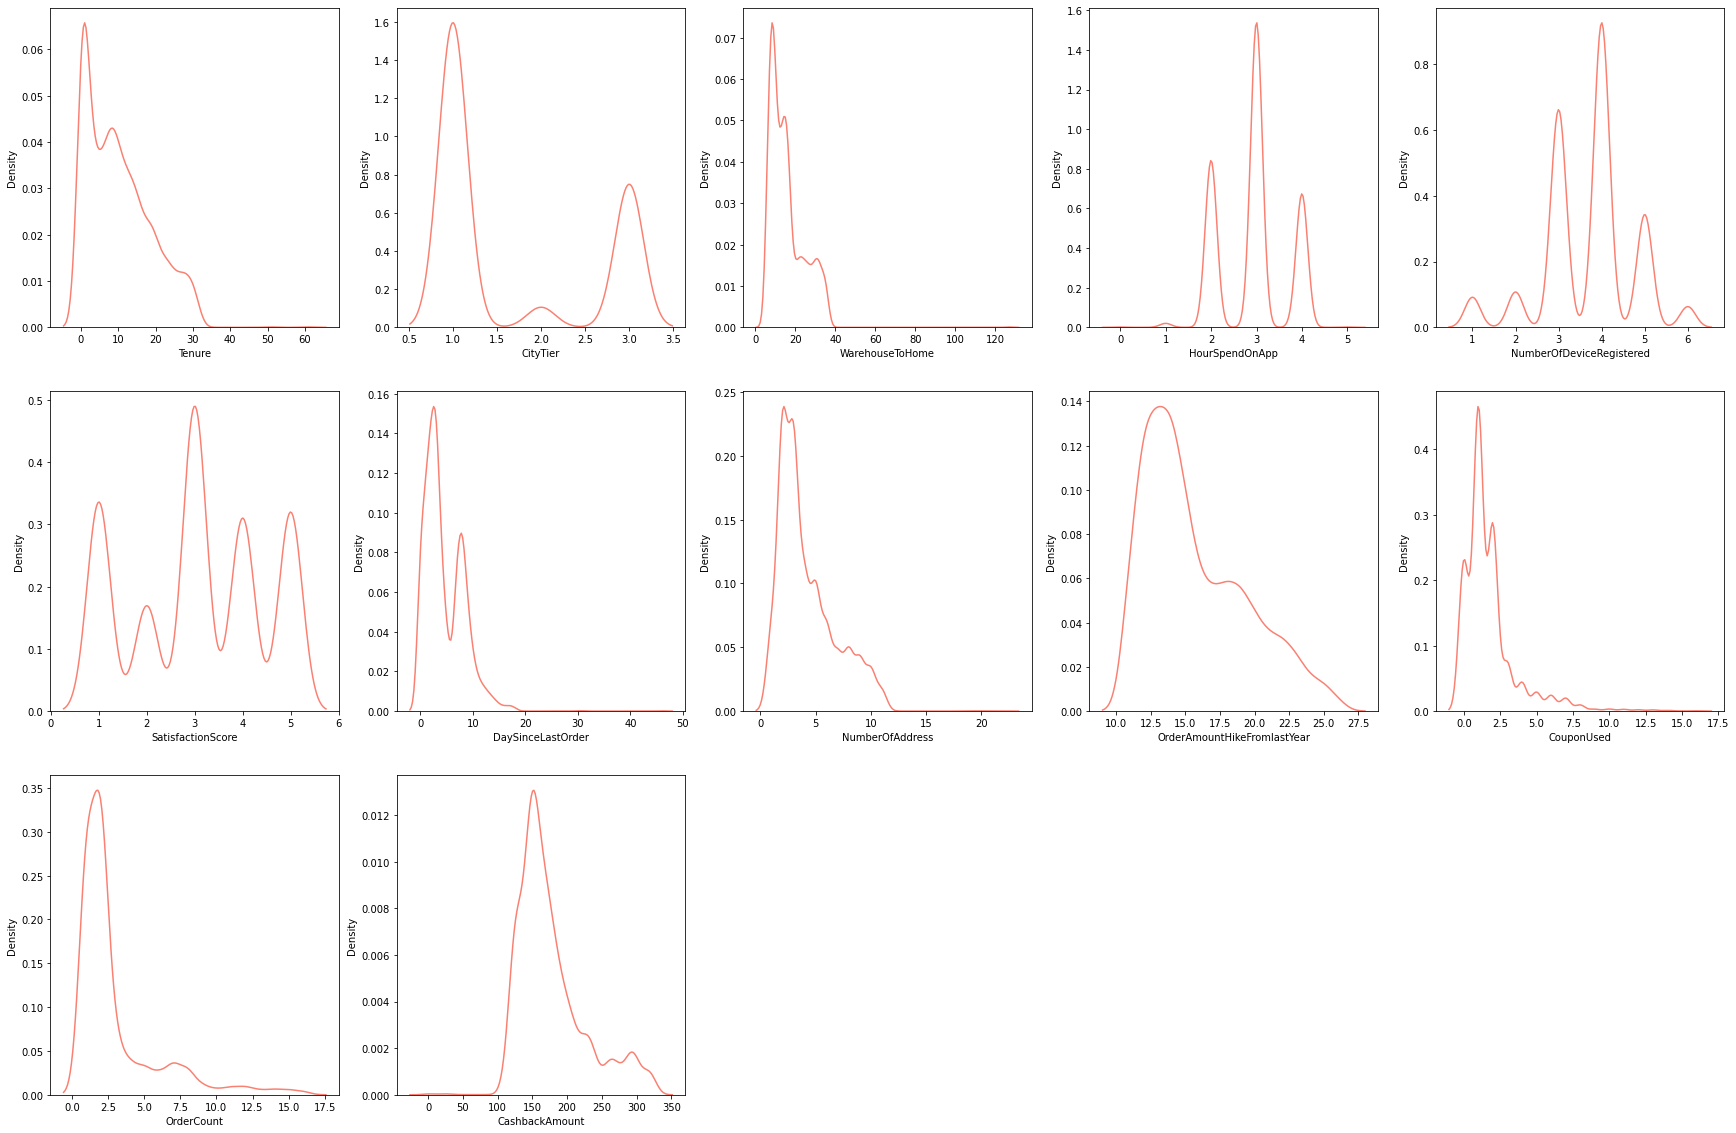

In [ ]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df_stg1[features[i]], color='salmon')
    plt.xlabel(features[i])

grafik yang menarik dari data numeric adalah :
1. tenure : right skewed, ada outlier disisi kanan
2. CityTier : Normal (range 1-3). 
3. warehouse to home : right skewed, ada outlier disisi kanan
4. HourSpendOnapp : Normal, ada outlier di kiri dan kanan
5. NumberOfDeviceRegistered : Normal, ad outlier di kiri dan kanan
6. SatisfactionScore : Normal, tidak ada outlier (range 1-5)
7. days since last order : right skewed, ada outlier disisi kanan
8. number of address : right skewed, ada outlier disisi kanan
9. Order Amount Hike From last Year : right skewed, ada outlier disisi kanan
10. Coupon Used: right skewed, ada outlier disisi kanan
11. Order Count : right skewed, ada outlier disisi kanan
12. cashback amount : right skewed, ada outlier di sisi kiri dan kanan

<b> Untuk data dengan distribusi skew ke kanan, dapat diolah dengan "Feature Transformation", tepatnya dengan Log Transformation agar sebaran data menjadi normal. 

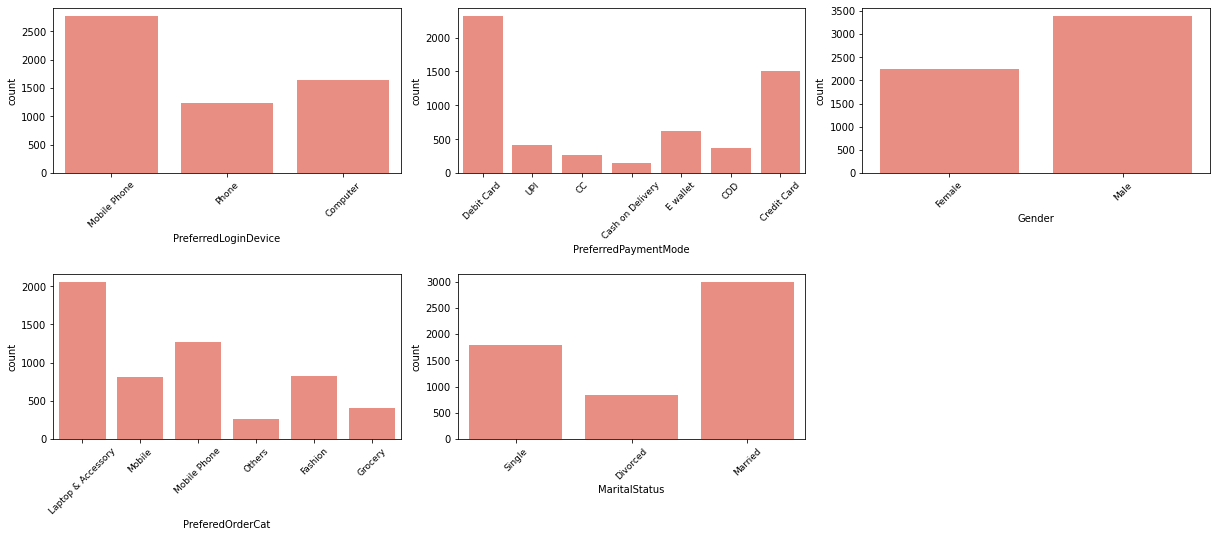

In [ ]:
plt.figure(figsize=(17,10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df_stg1[cats[i]], color='salmon', orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

1. pada feature Prefer Order Cat terdapat 2 variabel yang mirip yaitu, Phone dan Mobile Phone jika kategori tersebut sama, maka perlu di feature engineering
2. Pada Feature Preferred Payment Mode, terdapat variabel yang mirip, yaitu CC dengan Credit Card dan COD dengan Cash On Delivery. Jika feature tersebut sama, maka perlu dilakukan Feature Engineering

## <b> 3. Multivariate Analysis

In [ ]:
df_stg1_1.corr()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525
OrderAmountHikeFromlastYear,-0.010058,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


Text(0.5, 1.0, 'Korelasi')

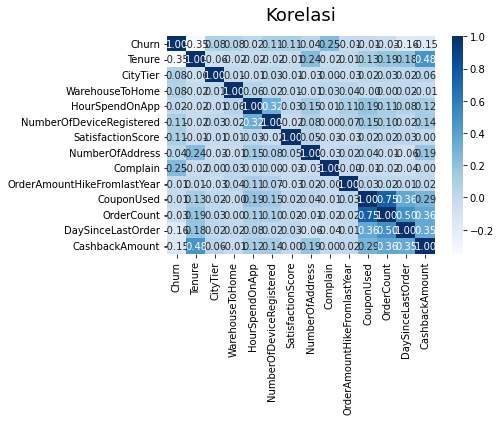

In [ ]:
#mask = np.triu(np.ones_like(df_stg1[nums].corr(), dtype=np.bool_))
heatmaps=sns.heatmap(df_stg1_1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

##### Dari correlation heatmap diatas, ada beberapa feature yang memilki korelasi lemah dengan target kita (Churn), yaitu :

1. number of Device Registration 0.11
2. satisfaction Score 0.11
3. complaint 0.25
4. tenure -0.35 (kuat, tetapi korelasi negatif)
5. Days Since Last Order -0.16
6. CashbackAmount -0.15

#####  Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `churn` korelasi positif lemah dengan `complain`, `SatisfactionScore`, `NumberOfDeviceRegistered` dan `CityTier` (decent potential feature)
* Sedangkan korelasi `Churn` dengan `HourSpendOnApp` dan `NumberOfAddress` sangat lemah ~0, ini menandakan bisa jadi mereka bukan fitur yang potensial
* `Tenure` memiliki korelasi positif cukup kuat dengan `CashbackAmount`(0.48); `CustomerID` dengan `HourSpendOnApp` (0.6) ; `CouponUsed` dengan `OrderCount`(0.75), `OrderCount` dengan `DaySinceLastOrder` (0.5), Ada kemungkinan *feature* ini redundan (dipilih salah satunya saja untuk training data)

##### Korelasi lainnya 
1. `Churn` berkorelasi negatif dengan `tenure` (korelasi = -0.35), artinya Churn cenderung terjadi pada customer dengan loyalitas yang rendah atau tidak terlalu lama menggunakan layanan. 
2. `Tenure` berkorelasi positif kuat dengan `CashbackAmount`(0.48). Artinya loyalitas dari customer dipengaruhi oleh jumlah cashback yang diberikan oleh E-commerce.  
3. `CashbackAmount` berkorelasi positif dengan `OrderCount`(0.36) dan `DaySinceLastOrder` (0.35). Tentu saja Pemberian dan jumlah cashback sangat mempengaruhi jumlah belanja atau jumlah orderan customer. 
4. `OrderCount` Berkorelasi positif kuat dengan `CouponUsed` (0.75)
5. `CouponUsed` berkorelasi positif dengan `DaySinceLastOrder` (0.36)

## <b> 4. Business Insight

### 1. Churn by Tenure

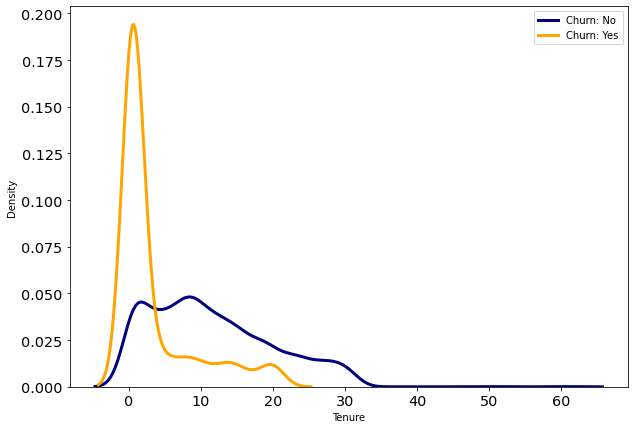

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df_stg1[df_stg1['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.kdeplot(df_stg1[df_stg1['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend() ; 

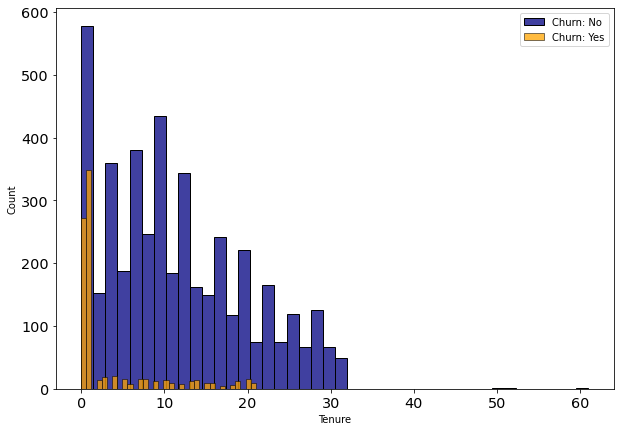

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_stg1[df_stg1['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.histplot(df_stg1[df_stg1['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend()

<b> INSIGHT :
Churn cenderung terjadi pada customer dengan loyalitas yang rendah atau belum terlalu lama menggunakan layanan. kemungkinan customer dengan loyalitas rendah ini adalah customer yang hanya menikmati flash sale atau promo singkat, dll. Perlu dibuat fitur baru dalam layanan e-commerce seperti 'Gaining Poin or Coin' atau game mengumpulkan coin/poin tersebut yang nantinya dapat ditukar, atau lotre-lotre dari hasil penukaran point dan coin untuk meningkatkan rasa penasaran, experience dan ambisi dari customer sehingga dapat meningkatkan retensi dari pelanggan.

### 2. Kategori Produk yang paling banyak diminati

In [ ]:
df_pref_order = df_stg1.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'count'}).reset_index()
df_pref_order['ratio']=df_pref_order['CustomerID'].apply(lambda x:round( x*100.0/(df_pref_order['CustomerID'].sum()),2))
df_pref_order

,PreferedOrderCat,Churn,CustomerID,ratio
0,Fashion,0,698,12.40
1,Fashion,1,128,2.27
2,Grocery,0,390,6.93
3,Grocery,1,20,0.36
4,Laptop & Accessory,0,1840,32.68
5,Laptop & Accessory,1,210,3.73
6,Mobile,0,589,10.46
7,Mobile,1,220,3.91
8,Mobile Phone,0,921,16.36
9,Mobile Phone,1,350,6.22


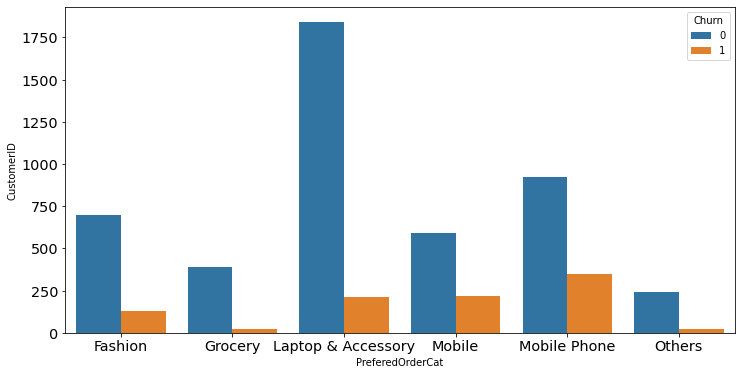

In [ ]:
sns.barplot(x='PreferedOrderCat', y='CustomerID',hue='Churn', data=df_pref_order);

<b> Kategori laptop&accesory dan mobile Phone menjadi yang paling banyak diburu. untuk kategori barang yang ingin dijual perlu ditingkatkan lagi atau diseimbangkan lagi. Seperti contohnya untuk fashion, dengan meningkatkan jumlah customer wanita diharapkan penjualan barang dengan kategori Fashion ini dapat ditingkatkan. atau barang dengan kategori others, dengan melakukan marketing campaign seperti flash sale diharapkan mampu menaikkan popularitas barang ini dan meningkatkan penjualannya, sehingga penjualan tidak hanya terfokus pada satu kategori saja.  

### 3. Churn by Gender

In [ ]:
df_group = df_stg1.groupby(['Gender','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group['ratio']=df_group['CustomerID'].apply(lambda x:round( x*100.0/(df_group['CustomerID'].sum()),2))
df_group

,Gender,Churn,CustomerID,ratio
0,Female,0,1898,33.71
1,Female,1,348,6.18
2,Male,0,2784,49.45
3,Male,1,600,10.66


In [ ]:
df_gender = df_stg1.groupby(['Churn', 'Gender']).agg({'CustomerID':'count'}).reset_index()
df_churn = df_stg1.groupby('Churn').agg({'CustomerID':'count'}).reset_index()

In [ ]:
df_gender_intotal = df_gender.merge(df_churn, on = 'Churn', how = 'left')
df_gender_intotal

,Churn,Gender,CustomerID_x,CustomerID_y
0,0,Female,1898,4682
1,0,Male,2784,4682
2,1,Female,348,948
3,1,Male,600,948


In [ ]:
df_gender_intotal['Rasio (%)'] = df_gender_intotal['CustomerID_x']/df_gender_intotal['CustomerID_y']*100
df_gender_intotal

,Churn,Gender,CustomerID_x,CustomerID_y,Rasio (%)
0,0,Female,1898,4682,40.538232
1,0,Male,2784,4682,59.461768
2,1,Female,348,948,36.708861
3,1,Male,600,948,63.291139


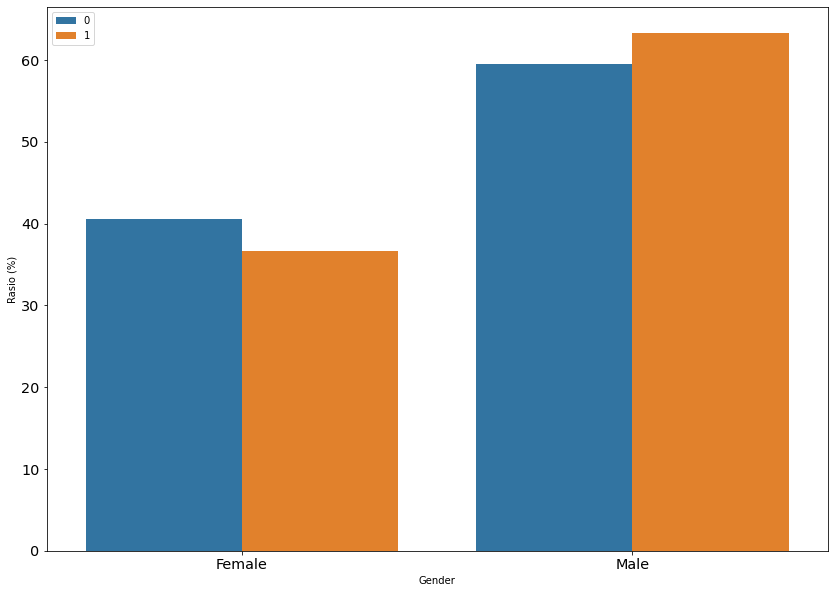

In [ ]:
plt.figure(figsize = (14,10))
sns.barplot(x='Gender', y='Rasio (%)', hue='Churn', data=df_gender_intotal)
plt.legend()

<b> Jumlah Customer pria lebih banyak dibandingkan wanita, akan tetapi jumolah customer pria yang chun justru lebih banyak dari wanita. Menurut artikel yang dikutip dari mag for woman, wanita lebih suka berbelanja dan merupakan customer yang lebih baik dibandingkan pria. Salah satu alasan wanita menyukai 'shopping' atau berbelanja adalah naluri wanita yang selalu ingin mengumpulkan sesuatu. pada case ini, jumlah customer wanita lebih sedikit dibandingkan wanita, tetapi persentase yang churn justru lebih sedikit dari pria karena wanita memang lebih setia dalam hal berbelanja. Sedangkan pria dalam hal ini kemungkinan mereka hanya mengejar promo dan cashback dari e-commerce ketika berbelanja. Perlu dilakukan marketting campaign untuk menarik wanita dan menambah produk2 yang dapat menarik wanita untuk berbelanja pada platform kita. 

### 4. Churn by Complain

In [ ]:
df_group2 = df_stg1.groupby(['Complain','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group_complain = df_stg1.groupby('Complain').agg({'CustomerID':'count'}).reset_index()

In [ ]:
data_complain = df_group2.merge(df_group_complain, on = 'Complain', how = 'left')
data_complain

,Complain,Churn,CustomerID_x,CustomerID_y
0,0,0,3586,4026
1,0,1,440,4026
2,1,0,1096,1604
3,1,1,508,1604


In [ ]:
data_complain['Rasio (%)'] = data_complain['CustomerID_x']/data_complain['CustomerID_y']*100
data_complain

,Complain,Churn,CustomerID_x,CustomerID_y,Rasio (%)
0,0,0,3586,4026,89.071038
1,0,1,440,4026,10.928962
2,1,0,1096,1604,68.329177
3,1,1,508,1604,31.670823


Text(0.5, 1.0, 'Complain X Churn')

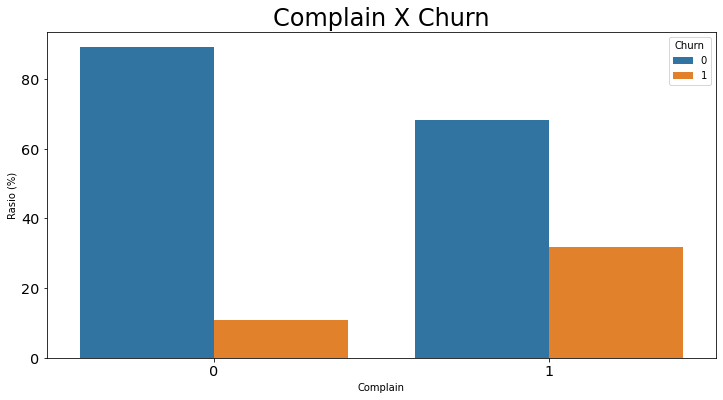

In [ ]:
conc1= "Persentase Customer  yang Churn dilihat dari Complain"
sns.barplot(x='Complain', y='Rasio (%)', hue='Churn', data=data_complain)
plt.title('Complain X Churn', size = 24)

<b> Customer yang melakukan complain meiliki persentase 31.67% terhadap customer yang churn sehingga dibutuhkan perbaikan dalam penanganan complain (resolve complain).

#PRE-PROCESSING

##Data Cleansing

###Handle missing values

In [ ]:
# jumlah entry NULL di setiap kolom
df_stg1.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
percentage_of_null_values = ((df_stg1.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

<b> Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. atau opsi lain, digunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier. 

In [ ]:
# drop feature dengan missing value <5%
df_stg1 = df_stg1.dropna(subset=['WarehouseToHome','HourSpendOnApp','CouponUsed','OrderCount','Tenure','OrderAmountHikeFromlastYear'])
df_stg1.isna().sum()

CustomerID                       0
Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# impute DaySinceLastOrder
df_stg1['DaySinceLastOrder'].fillna(df_stg1['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
# cek jumlah missing data setelah preprocessing
df_stg1.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
df_stg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4081 non-null   int64  
 1   Churn                        4081 non-null   int64  
 2   Tenure                       4081 non-null   float64
 3   PreferredLoginDevice         4081 non-null   object 
 4   CityTier                     4081 non-null   int64  
 5   PreferredPaymentMode         4081 non-null   object 
 6   Gender                       4081 non-null   object 
 7   HourSpendOnApp               4081 non-null   float64
 8   NumberOfDeviceRegistered     4081 non-null   int64  
 9   PreferedOrderCat             4081 non-null   object 
 10  SatisfactionScore            4081 non-null   int64  
 11  MaritalStatus                4081 non-null   object 
 12  NumberOfAddress              4081 non-null   int64  
 13  Complain          

###Handle duplicated data

In [ ]:
print('Data yang duplikat = ', df_stg1.duplicated().sum())

Data yang duplikat =  0


Data yang duplikat 0 sehingga tidak perlu di handling

###Handle outliers

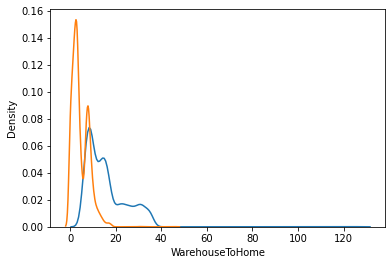

In [ ]:
#WarehouseToHome dan DaySinceLastOrder
# distribusi WarehouseToHome (nilai asli)
sns.kdeplot(df_stg1['WarehouseToHome'])
# distribusi DaySinceLastOrder (nilai asli)
sns.kdeplot(df_stg1['DaySinceLastOrder'])

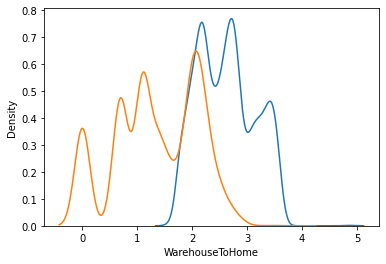

In [ ]:
# distribusi WarehouseToHome (setelah log transformation)
sns.kdeplot(np.log(df_stg1['WarehouseToHome']))
# distribusi DaySinceLastOrder (setelah log transformation)
sns.kdeplot(np.log(df_stg1['DaySinceLastOrder']))

In [ ]:
# maka kita transform
df_stg1['log_WarehouseToHome'] = np.log(df_stg1['WarehouseToHome'])
df_stg1['log_DaySinceLastOrder'] = np.log(df_stg1['DaySinceLastOrder'])

KeyError: ignored

In [ ]:
# drop kolom gaji original
df_stg1 = df_stg1.drop(columns=['WarehouseToHome','DaySinceLastOrder'])

KeyError: ignored

In [ ]:
nums_updated = ['Tenure','CityTier', 'log_WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'log_DaySinceLastOrder','NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']

In [ ]:
zscore = abs(stats.zscore(df_stg1[col]))
zscore

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_stg1)}')

filtered_entries = np.array([True] * len(df_stg1))

for col in nums_updated:
    zscore = abs(stats.zscore(df_stg1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_stg1 = df_stg1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_stg1)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 0


###Feature transformation

###Feature encoding

###Handle class imbalance

##Feature Engineering

###Feature selection

###Feature extraction

###4 feature tambahan
(selain yang sudah tersedia di dataset) yang 
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya 
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)